- Naive Bayes
- Multinomial Logistic Regression
- Random Forest
- K-means Clustering
- t-SNE and UMAP

In [0]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [0]:
adult_df = pd.read_csv('adult_data.txt', sep = ",", header = None)
adult_df.columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
                    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
                    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]
adult_df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
adult_df.shape

(32561, 15)

Will be predict the 'working class' of the 'adult' dataset using Naive Bayes and multinomial logistic regression. First, predict the working class with Naive Bayes. Create a confusion matrix and evaluate your model in terms of accuracy. Choose either Gaussian Naive Bayes or Bernoulli Naive Bayes.


* they need to be normally distributed
* handle outliers


In [0]:
adult_df.nunique()

Age                 73
WorkClass            9
fnlwgt           21648
Education           16
EducationNum        16
MaritalStatus        7
Occupation          15
Relationship         6
Race                 5
Gender               2
CapitalGain        119
CapitalLoss         92
HoursPerWeek        94
NativeCountry       42
Income               2
dtype: int64

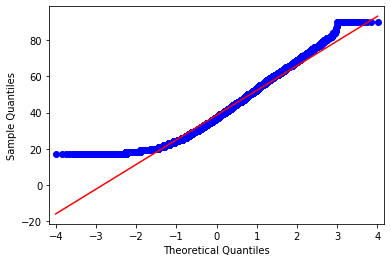

In [0]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from numpy import exp

# q-q plot for the 'age' column
qqplot(adult_df['Age'], line='s')
pyplot.show()

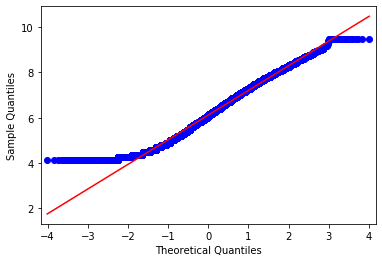

In [0]:
import numpy as np
import math

#qqplot(np.square(adult_df['Age']), line='s')
#qqplot(np.log(adult_df['Age']), line='s')
qqplot(np.sqrt(adult_df['Age']), line='s')
#qqplot(exp(adult_df['Age'])**2, line='s')

pyplot.show()
# find a better way to normalize



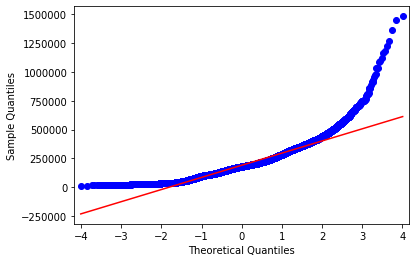

In [0]:
qqplot(adult_df['fnlwgt'], line='s')
pyplot.show()

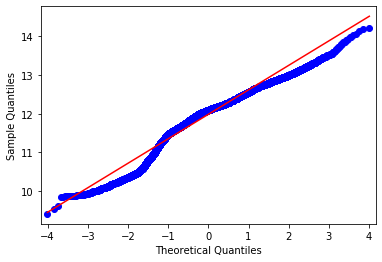

In [0]:
qqplot(np.log(adult_df['fnlwgt']), line='s')
pyplot.show()

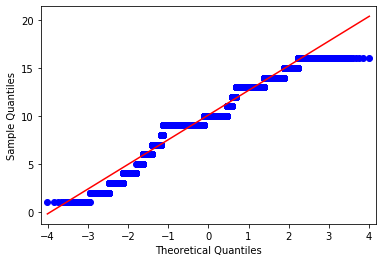

In [0]:
qqplot(adult_df['EducationNum'], line='s')
pyplot.show()
#looks like a categorical value

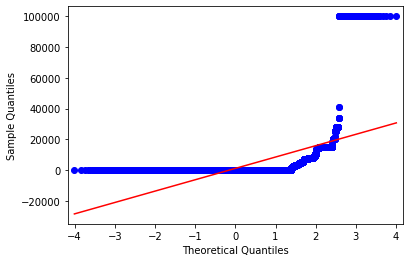

In [0]:
qqplot(adult_df['CapitalGain'], line='s')
pyplot.show()

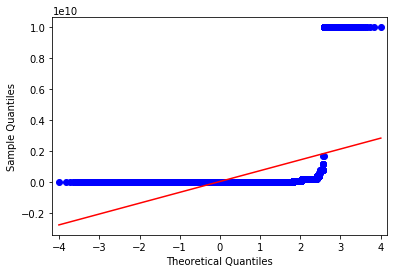

In [0]:
qqplot(np.square(adult_df['CapitalGain']), line='s')
pyplot.show()


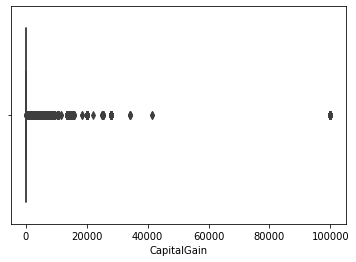

In [0]:
import seaborn as sns
sns.boxplot(x = adult_df['CapitalGain'])

In [0]:
print(adult_df['CapitalGain'].quantile(0.10))
print(adult_df['CapitalGain'].quantile(0.90))

0.0
0.0


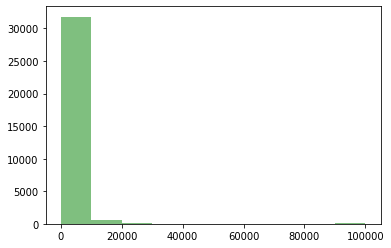

In [0]:
import matplotlib.pyplot as plt


plt.hist((adult_df['CapitalGain'] ), 
         bins=10, 
         alpha=0.5, 
         color='green',
         label='CapitalGain')

plt.show()

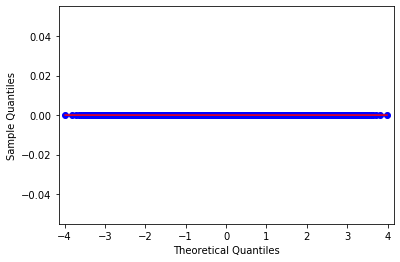

In [0]:
adult_df_1 = adult_df[(adult_df['CapitalGain'] <= 100)]
qqplot((adult_df_1['CapitalGain']), line='s')
pyplot.show()

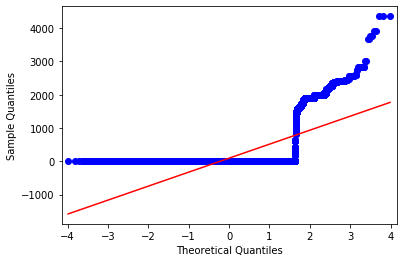

In [0]:
qqplot(adult_df_1['CapitalLoss'], line='s')
pyplot.show()

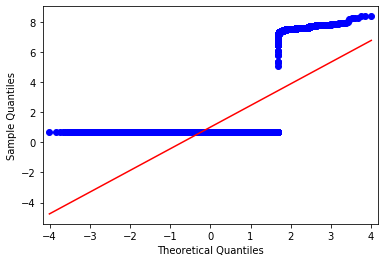

In [0]:
qqplot(np.log(adult_df['CapitalLoss']+2), line='s')
pyplot.show()


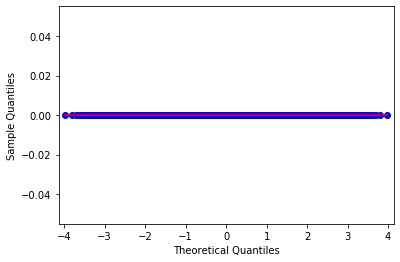

In [0]:
adult_df_2 = adult_df_1[(adult_df_1['CapitalLoss'] <= 100)]
qqplot((adult_df_2['CapitalLoss']), line='s')
pyplot.show()

Since CapitalGain, and Capital Loss have majority of zero values, it is hard to normalise them. Hence we drop them for now.

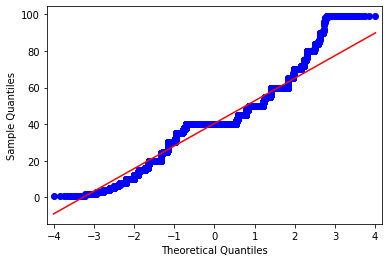

In [0]:
qqplot(adult_df['HoursPerWeek'], line='s')
pyplot.show()


This features seems to be normally distributed, we will also plot the histogram to visualize it better.

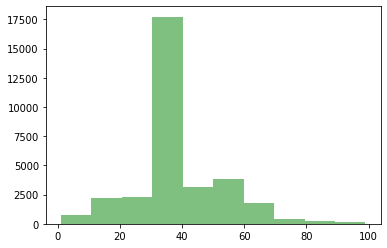

In [0]:
import matplotlib.pyplot as plt


plt.hist((adult_df['HoursPerWeek']), 
         bins=10, 
         alpha=0.5, 
         color='green',
         label='HoursPerWeek')

plt.show()

In [0]:
adult_df['AgePrep'] = np.sqrt(adult_df['Age'])
adult_df['fnlwgtPrep'] = np.log(adult_df['fnlwgt'])


In [0]:
adult_df['WorkClass1'] = adult_df['WorkClass'].astype('category')
adult_df['WorkClass_le'] = adult_df['WorkClass1'].cat.codes

In [0]:
data = adult_df[['AgePrep', 'fnlwgtPrep', 'HoursPerWeek']]
target = adult_df[['WorkClass_le']]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_scaled, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)


In [0]:
adult_df['WorkClass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian_clf = GaussianNB().fit(x_train, y_train)
y_pred_train = gaussian_clf.predict(x_train)
print("Training accuracy score = ", accuracy_score(y_train, y_pred_train))
y_pred_test = gaussian_clf.predict(x_test)
print("Testing accuracy score = ", accuracy_score(y_test, y_pred_test))

Training accuracy score =  0.6896498771498771
Testing accuracy score =  0.7001381851681253


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[  45,    0,    0,    0,  314,    0,   10,    0,    0],
       [   0,    0,    0,    0,  188,    0,    5,    0,    0],
       [   7,    0,    0,    0,  391,    0,    9,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0,    0],
       [  48,    0,    0,    0, 4475,    0,   62,    0,    0],
       [   2,    0,    0,    0,  198,    0,   10,    0,    0],
       [  21,    0,    0,    0,  435,    0,   40,    0,    0],
       [   2,    0,    0,    0,  241,    0,    5,    0,    0],
       [   0,    0,    0,    0,    3,    0,    1,    0,    0]])

**Multinomial Logistic Regression**

Using the same dataset, predict WorkClass using multinomial logistic regression. 



In [0]:
adult_df = pd.read_csv('adult_data.txt', sep = ",", header = None)
adult_df.columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
                    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
                    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]
adult_df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
adult_df['AgePrep'] = np.sqrt(adult_df['Age'])
adult_df['fnlwgtPrep'] = np.log(adult_df['fnlwgt'])

In [0]:
#Label encoding
adult_df['WorkClass_cat'] = adult_df['WorkClass'].astype('category')
adult_df['WorkClass_le'] = adult_df['WorkClass_cat'].cat.codes

adult_df['EducationNum'] = adult_df['EducationNum'].astype('category')
adult_df['EducationNum_le'] = adult_df['EducationNum'].cat.codes
  
adult_df['MaritalStatus'] = adult_df['MaritalStatus'].astype('category')
adult_df['MaritalStatus_le'] = adult_df['MaritalStatus'].cat.codes

adult_df['Occupation'] = adult_df['Occupation'].astype('category')
adult_df['Occupation_le'] = adult_df['Occupation'].cat.codes

adult_df['Relationship'] = adult_df['Relationship'].astype('category')
adult_df['Relationship_le'] = adult_df['Relationship'].cat.codes

adult_df['Race'] = adult_df['Race'].astype('category')
adult_df['Race_le'] = adult_df['Race'].cat.codes

adult_df['Gender'] = adult_df['Gender'].astype('category')
adult_df['Gender_le'] = adult_df['Gender'].cat.codes

adult_df['NativeCountry'] = adult_df['NativeCountry'].astype('category')
adult_df['NativeCountry_le'] = adult_df['NativeCountry'].cat.codes

adult_df['Income'] = adult_df['Income'].astype('category')
adult_df['Income_le'] = adult_df['Income'].cat.codes



In [0]:
data = adult_df[['AgePrep', 'fnlwgtPrep','HoursPerWeek','EducationNum_le', 'MaritalStatus_le','Occupation_le','Relationship_le','Race_le','Gender_le'
,'NativeCountry_le','Income_le']]
target = adult_df['WorkClass_le']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [0]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0, 
                            multi_class='multinomial', 
                            solver='saga' #solver - ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
                            #,class_weight = 'balanced'
                            ,penalty = 'elasticnet' #penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
                            ,l1_ratio = 0.5
)


In [0]:
from sklearn.metrics import accuracy_score
logReg_model = logReg.fit(x_train, y_train) 
y_predicted_train = logReg_model.predict(x_train)
print("Training accuracy = ", accuracy_score(y_train,  y_predicted_train))
y_predicted = logReg_model.predict(x_test)
print("Test accuracy = ", accuracy_score(y_test,  y_predicted))

Training accuracy =  0.7511517199017199
Test accuracy =  0.760939659143252


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
y = pd.DataFrame(logReg_model.predict_proba(x_test))
y.columns = ['prob' + str(col) for col in y.columns]

In [0]:
y['0'] = np.where(y_test == 0, 1, 0)
y['1'] = np.where(y_test == 1, 1, 0)
y['2'] = np.where(y_test == 2, 1, 0)
y['3'] = np.where(y_test == 3, 1, 0)
y['4'] = np.where(y_test == 4, 1, 0)
y['5'] = np.where(y_test == 5, 1, 0)
y['6'] = np.where(y_test == 6, 1, 0)
y['7'] = np.where(y_test == 7, 1, 0)
y['8'] = np.where(y_test == 8, 1, 0)
y.head()

,prob0,prob1,prob2,prob3,prob4,prob5,prob6,prob7,prob8,0,1,2,3,4,5,6,7,8
0,1.416155e-22,0.016116,0.034183,6.573201e-09,0.706107,0.054377,0.182966,0.006229,0.000023,0,0,0,0,0,0,1,0,0
1,1.761181e-22,0.006027,0.018983,1.707579e-05,0.934003,0.003297,0.021742,0.015401,0.000530,0,0,0,0,1,0,0,0,0
2,4.602465e-14,0.040315,0.052348,7.272633e-06,0.748386,0.053724,0.059035,0.046103,0.000081,0,0,0,0,1,0,0,0,0
3,1.938603e-28,0.009449,0.050234,3.850027e-08,0.842619,0.014683,0.059476,0.023339,0.000200,0,0,0,0,1,0,0,0,0
4,8.096552e-20,0.010258,0.046219,2.654569e-06,0.889477,0.007438,0.030951,0.015516,0.000139,0,0,0,0,1,0,0,0,0


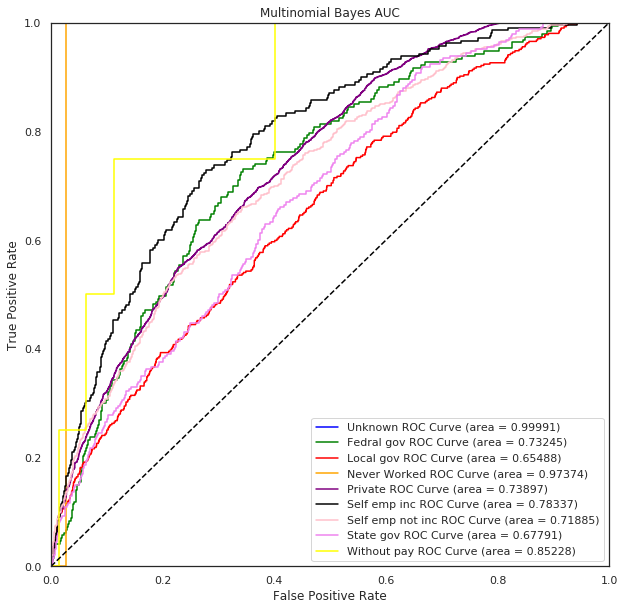

In [0]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,10)})


plt.plot(roc_curve(y['0'], y['prob0'])[0],roc_curve(y['0'], y['prob0'])[1], 
         color = 'blue', label='Unknown ROC Curve (area = %0.5f)' % roc_auc_score(y['0'], y['prob0']))

plt.plot(roc_curve(y['1'], y['prob1'])[0],roc_curve(y['1'], y['prob1'])[1], 
         color = 'green', label='Fedral gov ROC Curve (area = %0.5f)' % roc_auc_score(y['1'], y['prob1']))

plt.plot(roc_curve(y['2'], y['prob2'])[0],roc_curve(y['2'], y['prob2'])[1], 
         color = 'red', label='Local gov ROC Curve (area = %0.5f)' % roc_auc_score(y['2'], y['prob2']))

plt.plot(roc_curve(y['3'], y['prob3'])[0],roc_curve(y['3'], y['prob3'])[1], 
         color = 'orange', label='Never Worked ROC Curve (area = %0.5f)' % roc_auc_score(y['3'], y['prob3']))

plt.plot(roc_curve(y['4'], y['prob4'])[0],roc_curve(y['4'], y['prob4'])[1], 
         color = 'purple', label='Private ROC Curve (area = %0.5f)' % roc_auc_score(y['4'], y['prob4']))

plt.plot(roc_curve(y['5'], y['prob5'])[0],roc_curve(y['5'], y['prob5'])[1], 
         color = 'black', label='Self emp inc ROC Curve (area = %0.5f)' % roc_auc_score(y['5'], y['prob5']))

plt.plot(roc_curve(y['6'], y['prob6'])[0],roc_curve(y['6'], y['prob6'])[1], 
         color = 'pink', label='Self emp not inc ROC Curve (area = %0.5f)' % roc_auc_score(y['6'], y['prob6']))

plt.plot(roc_curve(y['7'], y['prob7'])[0],roc_curve(y['7'], y['prob7'])[1], 
         color = 'violet', label='State gov ROC Curve (area = %0.5f)' % roc_auc_score(y['7'], y['prob7']))

plt.plot(roc_curve(y['8'], y['prob8'])[0],roc_curve(y['8'], y['prob8'])[1], 
         color = 'yellow', label='Without pay ROC Curve (area = %0.5f)' % roc_auc_score(y['8'], y['prob8']))


plt.plot([0, 2], [0, 2], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial Bayes AUC')
plt.legend()
plt.show()


The above figure show the ROC curve and the AUC score for each of the Work Class categories. It is seen that the 'Unknown' work class has the best AUC score almost equal to 1 and the least AUC score is for 'Local gov' work class with an AUC score of 0.65. 

**Random Forest**

Using the same dataset, we will now predict if individuals make more or less than $50k ('Income' field is now our target). 

In [0]:
data = adult_df[['AgePrep', 'fnlwgtPrep','HoursPerWeek','EducationNum_le', 'MaritalStatus_le','Occupation_le','Relationship_le','Race_le','Gender_le'
,'NativeCountry_le','WorkClass_le']]
target = adult_df['Income_le']


In [0]:
adult_df[['Income', 'Income_le']][:10]

,Income,Income_le
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
5,<=50K,0
6,<=50K,0
7,>50K,1
8,>50K,1
9,>50K,1


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_scaled, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(random_state = 0, n_jobs = -1, criterion = 'gini', max_features = 5, max_depth = 11)

In [0]:
RF_model = RF_clf.fit(x_train, y_train)

In [0]:
train_probs = RF_model.predict_proba(x_train)
test_probs = RF_model.predict_proba(x_test)
train_probs


array([[0.7927255 , 0.2072745 ],
       [0.22945556, 0.77054444],
       [0.60045149, 0.39954851],
       ...,
       [0.94565751, 0.05434249],
       [0.68687318, 0.31312682],
       [0.30776546, 0.69223454]])

In [0]:
train_prob_columns = ['<=50k', '>50k']
preds_train = pd.DataFrame(train_probs, columns=train_prob_columns)
preds_test = pd.DataFrame(test_probs, columns=train_prob_columns)

In [0]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, preds_train['>50k'])
metrics.auc(fpr, tpr)

0.9443178098945979

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_test['>50k'])
metrics.auc(fpr, tpr)

0.8878818710292222

The model is clearly overfitting. 



Grid search 

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF_grid = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10, 50, 100, 200, 500], 'criterion': ('gini', 'entropy'), 'max_depth' : [5,10, 15, 25, 40],
              'min_samples_split' : (2,10,50,100), 'min_samples_leaf' : [1,10,20],
              'max_features': (3,6,9,11), 'min_impurity_decrease': (0.0, 0.5, 0.1, 1.0)}

grid_model = GridSearchCV(RF_grid, parameters)
grid_model.fit(x_train, y_train)

In [0]:
train_probs = grid_model.predict_proba(x_train)
test_probs = grid_model.predict_proba(x_test)
preds_train = pd.DataFrame(train_probs, columns=train_prob_columns)
preds_test = pd.DataFrame(test_probs, columns=train_prob_columns)
fpr, tpr, thresholds = metrics.roc_curve(y_train, preds_train['>50k'])
metrics.auc(fpr, tpr)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_test['>50k'])
metrics.auc(fpr, tpr)

In [0]:
grid_model.best_params_

Manually tuning the parameters

In [0]:
from sklearn import metrics
RF_clf = RandomForestClassifier(random_state = 0, n_jobs = -1, criterion = 'gini', max_features = 8, max_depth = 20,
                               min_samples_split = 10,
                               min_samples_leaf = 10,
                               min_impurity_decrease = 0.5
                               )
RF_model = RF_clf.fit(x_train, y_train)
train_probs = RF_model.predict_proba(x_train)
test_probs = RF_model.predict_proba(x_test)
train_prob_columns = ['<=50k', '>50k']
preds_train = pd.DataFrame(train_probs, columns=train_prob_columns)
preds_test = pd.DataFrame(test_probs, columns=train_prob_columns)
fpr, tpr, thresholds = metrics.roc_curve(y_train, preds_train['>50k'])
print("Training AUC score = ", metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_test['>50k'])
print("Testing AUC score = ", metrics.auc(fpr, tpr))

Training AUC score =  0.5
Testing AUC score =  0.5


In [0]:
RF_clf = RandomForestClassifier(random_state = 0, n_jobs = -1, criterion = 'gini', max_features = 5, max_depth = 11,
                               min_samples_split = 10,
                               min_samples_leaf = 15,
                               min_impurity_decrease = 0.01
                               )
RF_model = RF_clf.fit(x_train, y_train)
train_probs = RF_model.predict_proba(x_train)
test_probs = RF_model.predict_proba(x_test)
train_prob_columns = ['<=50k', '>50k']
preds_train = pd.DataFrame(train_probs, columns=train_prob_columns)
preds_test = pd.DataFrame(test_probs, columns=train_prob_columns)
fpr, tpr, thresholds = metrics.roc_curve(y_train, preds_train['>50k'])
print("Training AUC score = ", metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_test['>50k'])
print("Testing AUC score = ", metrics.auc(fpr, tpr))

Training AUC score =  0.8502752484431378
Testing AUC score =  0.8466584386609937


The min_impurity_decrease hyperparameter indicates the value of impurity greater than which a split is induced. By default this value is set to 0. It is seen that this feature has the most impact on overfitting the model. An increase in this hyperparameter to 0.5 underfits the models. But the value of 0.01 seems to do the job.

**K-means Clustering**

We will analyze MLB baseball pitcher performance over the past 5 years. The data is from fangraphs.com

In [0]:
mlb_df = pd.read_csv('pitcher_war.csv', sep = ",")
mlb_df.head()


,Season,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,Age,ERA.1,CG,ShO,SV.1,BS,IP.1,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9.1,BB/9.1,K/BB,H/9,HR/9.1,AVG,WHIP,BABIP.1,LOB%.1,FIP.1,GB/FB,LD%,GB%.1,FB%,IFFB%,HR/FB.1,IFH%,BUH%,Starting,Start-IP,tERA,xFIP.1,WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%.1,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,playerid
0,2015,Zack Greinke,Dodgers,19,3,0,32,32,222.2,8.08,1.62,0.57,0.229,86.50%,48.00%,7.30%,1.66,2.76,3.22,5.3,31,1.66,1,0,0,0,222.2,843,148,43,41,14,40,1,5,7,0,200,281,193,112,18,1161,2078,3239,101,12,12,0,8.08,1.62,5.00,5.98,0.57,0.185,0.84,0.229,86.50%,2.76,1.46,19.10%,48.00%,32.90%,9.30%,7.30%,4.30%,0.00%,46.9,222.2,2.81,3.22,6.76,56.24,6.24,1.06,1.03,0.87,1.22,31,5.47,0.90,50.70%,91.8,19.30%,86.9,NaN,NaN,9.10%,73.6,20.90%,88.5,NaN,NaN,NaN,NaN,0.10%,NaN,20.0,18.6,NaN,-0.5,19.8,NaN,NaN,1.22,2.98,NaN,-0.18,2.92,NaN,NaN,33.30%,69.10%,47.50%,60.60%,85.10%,74.80%,39.90%,64.10%,12.00%,0,0,0,44,73,83,23.70%,4.70%,3.27,4.08,-1.10,43.20%,10.00%,33.30%,64.90%,47.50%,57.80%,85.50%,74.80%,45.00%,22.9,9.4,4.0,0.1,4.1,31 - 31,19.00%,38.60%,36.10%,25.30%,21.70%,51.50%,26.80%,3.21,30.10%,21.10%,33.60%,65.20%,47.50%,58.00%,85.90%,74.90%,44.10%,23.4,3.9,103,55,187,68,58,74,65,77,118,115,61,91,104,101,64,102,101,96,117,99,91,1943
1,2018,Jacob deGrom,Mets,10,9,0,32,32,217.0,11.16,1.91,0.41,0.281,82.00%,46.40%,6.30%,1.70,1.99,2.60,9.0,30,1.70,1,0,0,0,217.0,835,152,48,41,10,46,3,5,2,0,269,235,160,111,26,999,2213,3212,86,16,9,2,11.16,1.91,5.85,6.30,0.41,0.194,0.91,0.281,82.00%,1.99,1.47,21.90%,46.40%,31.60%,16.30%,6.30%,6.80%,22.20%,75.7,217.0,2.16,2.60,5.85,52.57,5.70,1.14,1.06,0.88,1.01,31,4.62,0.52,52.10%,96.0,23.90%,91.1,NaN,NaN,7.90%,82.7,16.10%,89.0,NaN,NaN,NaN,NaN,0.30%,NaN,23.9,15.9,NaN,4.6,12.8,NaN,NaN,1.43,2.08,NaN,1.81,2.48,NaN,NaN,37.90%,68.80%,51.70%,57.70%,79.70%,70.80%,44.60%,66.50%,15.10%,0,0,0,45,49,64,32.20%,5.50%,2.78,3.57,-0.29,43.50%,8.90%,36.80%,66.30%,51.70%,53.90%,79.90%,70.70%,50.70%,21.3,9.6,0.4,0.1,0.5,30 - 30,26.70%,42.30%,32.00%,25.60%,25.20%,48.20%,26.60%,2.60,38.90%,16.10%,36.70%,66.10%,51.80%,52.40%,80.40%,70.80%,51.30%,21.9,-2.1,130,58,226,75,38,80,70,96,112,144,64,101,106,92,50,106,92,101,138,104,76,10954
2,2015,Jake Arrieta,Cubs,22,6,0,33,33,229.0,9.28,1.89,0.39,0.246,80.00%,56.20%,7.80%,1.77,2.35,2.61,7.0,29,1.77,4,3,0,0,229.0,870,150,52,45,10,48,2,6,6,0,236,318,129,119,12,1202,2236,3438,118,22,14,3,9.28,1.89,4.92,5.90,0.39,0.184,0.86,0.246,80.00%,2.35,2.47,21.00%,56.20%,22.80%,9.30%,7.80%,6.90%,21.40%,60.0,229.0,2.77,2.61,5.93,56.13,6.04,0.92,0.92,0.87,0.83,29,5.78,0.67,50.70%,94.6,NaN,NaN,29.10%,90.3,15.40%,80.7,4.80%,89.0,NaN,NaN,NaN,NaN,0.20%,NaN,23.7,NaN,23.5,7.7,2.8,NaN,NaN,1.36,NaN,2.35,1.45,1.74,NaN,NaN,34.20%,63.00%,46.90%,61.30%,86.70%,76.30%,44.10%,60.20%,11.10%,0,0,0,45,61,68,27.10%,5.50%,2.75,4.64,-0.58,15.70%,NaN,32.80%,62.30%,47.00%,59.00%,85.90%,76.10%,47.90%,22.7,9.1,2.9,-0.8,2.1,29 - 29,21.60%,34.30%,37.80%,27.90%,22.80%,55.20%,22.10%,2.90,33.80%,4.70%,33.00%,61.80%,46.90%,59.50%,85.60%,76.20%,48.40%,23.3,2.2,118,64,184,67,40,73,67,82,110,131,71,100,121,70,68,90,106,106,123,106,75,4153
3,2014,Clayton Kershaw,Dodgers,21,3,0,27,27,198.1,10.85,1.41,0.41,0.278,81.60%,51.80%,6.60%,1.77,1.81,2.08,7.

In [0]:
mlb_df.shape

(776, 187)

In [0]:
mlb_df.describe()

,Season,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,ERA,FIP,xFIP,WAR,Age,ERA.1,CG,ShO,SV.1,BS,IP.1,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9.1,BB/9.1,K/BB,H/9,HR/9.1,AVG,WHIP,BABIP.1,FIP.1,GB/FB,Starting,Start-IP,tERA,xFIP.1,WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FBv,SLv,CTv,CBv,CHv,SFv,KNv,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,HLD,SD,MD,ERA-,FIP-,xFIP-,SIERA,RS/9,E-F,Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,kwERA,Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,playerid
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.00000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,569.000000,303.000000,670.000000,726.000000,79.000000,9.000000,0.0,776.000000,570.000000,305.000000,670.000000,726.000000,79.000000,9.000000,776.000000,570.000000,305.000000,670.000000,726.000000,79.000000,9.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,2014.069588,12.231959,9.994845,0.010309,31.189433,30.817010,190.023196,7.728338,2.680863,1.001392,0.289720,3.750219,3.837887,3.881843,2.915335,28.639175,3.750219,1.015464,0.461340,0.010309,0.005155,190.023196,794.497423,179.601804,85.289948,78.564433,20.930412,56.198454,2.395619,6.475515,5.902062,0.564433,163.538660,251.019330,192.538660,113.176546,18.778351,1083.335052,1948.479381,3031.814433,100.145619,15.585052,11.369845,2.801546,7.728338,2.680863,3.126662,8.524175,1.001392,0.245418,1.245103,0.289720,3.837887,1.376353,27.113660,189.35567,4.174021,3.881843,0.718943,6.973673,0.735644,0.976289,0.907500,0.873621,1.085966,30.041237,0.657809,0.068505,91.590464,83.934446,87.625083,76.952537,83.813912,84.812658,76.622222,NaN,1.381314,4.101579,0.731475,0.729104,1.073416,0.921519,0.711111,0.052796,0.389386,-0.552230,-0.189687,-0.312906,-0.121266,0.542222,0.028351,0.081186,0.076031,92.780928,94.876289,95.766753,3.937887,4.753402,-0.087822,21.941366,3.098711,0.258247,-0.073840,0.182216,3.900992,22.563144,0.162371,99.198454,86.291237,124.470361,97.791237,95.220361,98.126289,94.744845,98.342784,101.630155,101.301546,87.447165,99.533505,101.246134,98.677835,97.478093,100.836340,99.591495,99.199742,100.347938,100.429124,99.121134,6432.974227
std,2.834407,3.368976,2.903164,0.101075,2.156207,2.217239,20.629595,1.659431,0.726437,0.306698,0.022667,0.753442,0.644552,0.569650,1.574829,3.919014,0.753442,1.392058,0.766088,0.101075,0.071657,20.629595,78.692214,25.137813,15.626353,14.522986,5.995508,14.687780,2.076456,3.319451,3.730010,0.836875,40.241478,49.628227,41.249936,17.406443,7.743624,129.768354,205.274016,304.195831,20.049762,5.231466,5.261283,1.952810,1.659431,0.726437,1.236379,1.037019,0.306698,0.023333,0.140061,0.022667,0.644552,0.452573,13.800929,21.22388,0.715253,0.569650,1.736044,16.947970,1.775658,0.053184,0.046572,0.020826,0.172534,2.312011,1.701212,0.758467,2.491925,2.837899,2.249716,3.352426,2.994420,3.0818

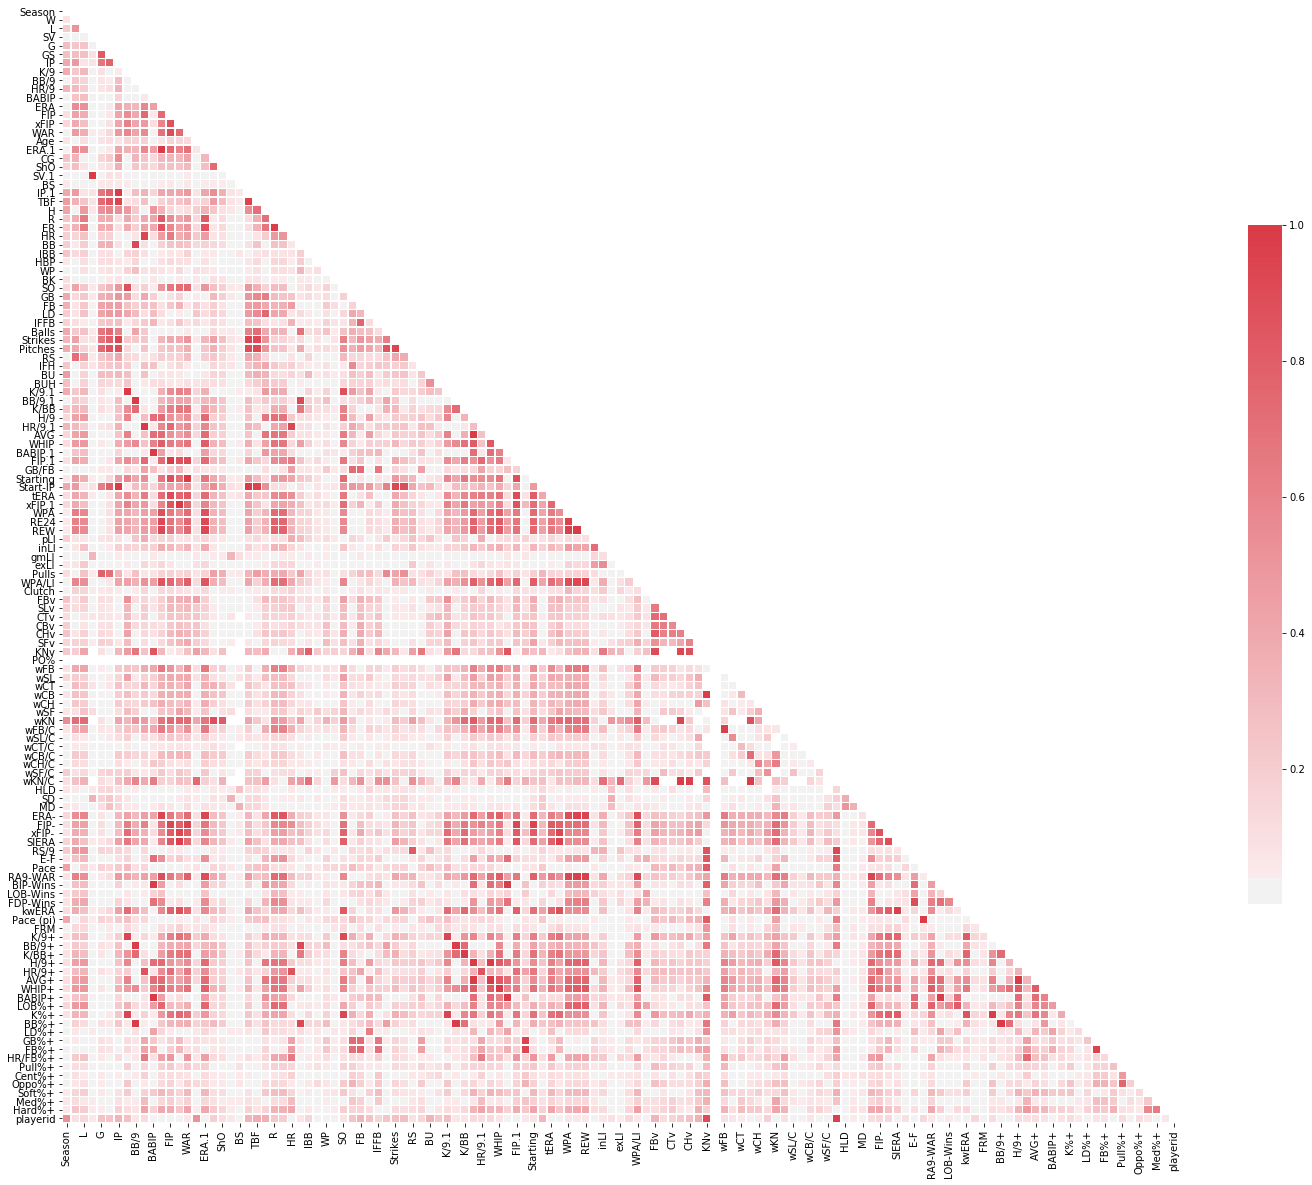

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = mlb_df.corr().abs()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
mlb_df.isnull().sum(axis=0)

Season                0
Name                  0
Team                  0
W                     0
L                     0
SV                    0
G                     0
GS                    0
IP                    0
K/9                   0
BB/9                  0
HR/9                  0
BABIP                 0
LOB%                  0
GB%                   0
HR/FB                 0
ERA                   0
FIP                   0
xFIP                  0
WAR                   0
Age                   0
ERA.1                 0
CG                    0
ShO                   0
SV.1                  0
BS                    0
IP.1                  0
TBF                   0
H                     0
R                     0
ER                    0
HR                    0
BB                    0
IBB                   0
HBP                   0
WP                    0
BK                    0
SO                    0
GB                    0
FB                    0
LD                    0
IFFB            

In [0]:
data = mlb_df[['W','HR', 'R', 'HR/9', 'K/BB', 'WHIP', 'WAR', 'Strikes', 'Starting', 'K/9', 'WPA/LI', 'FIP']]

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data_scaled = mms.fit_transform(data)

In [0]:
data_scaled

array([[0.75      , 0.2195122 , 0.02298851, ..., 0.44500505, 0.91884581,
        0.22619048],
       [0.3       , 0.12195122, 0.08045977, ..., 0.75580222, 0.84220018,
        0.04285714],
       [0.9       , 0.12195122, 0.12643678, ..., 0.56609485, 0.94679892,
        0.12857143],
       ...,
       [0.25      , 0.3902439 , 0.93103448, ..., 0.25227043, 0.20919748,
        0.79285714],
       [0.1       , 0.85365854, 0.93103448, ..., 0.30474268, 0.        ,
        1.        ],
       [0.3       , 0.53658537, 0.94252874, ..., 0.28456105, 0.18845807,
        0.89285714]])

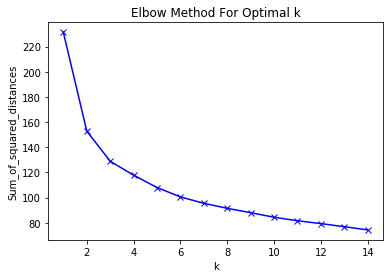

In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The best K clusters is one that has minimum within cluster variation and maximum distance between clusters. This can be intuitively determined from the graph above as the point of last drastic drop in error. Hence a K value of 5 is chosen. 

In [0]:
from sklearn.cluster import KMeans
clusterer = KMeans(5, random_state=1)

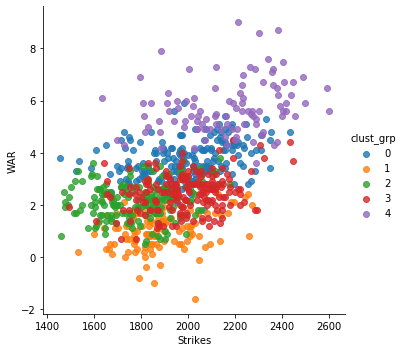

In [0]:
clusterer.fit(data_scaled)
mlb_df['clust_grp'] = clusterer.predict(data_scaled)
sns.lmplot(data = mlb_df, x = 'Strikes', y = 'WAR', hue = 'clust_grp', fit_reg = False)

**t-SNE and UMAP**

 Using the same data for K-means clustering, perform t-SNE and a supervised UMAP. When plotting, plot the observations by the first two components of t-SNE or UMAP, respectively. Color the points of the scatterplot by WAR. 

In [0]:
from sklearn.manifold import TSNE
tsne_embedded = TSNE(n_components = 2
                 ,perplexity = 100
                ).fit_transform(data_scaled)

In [0]:
tsne_embedded_df = pd.DataFrame(tsne_embedded)
tsne_embedded_df = tsne_embedded_df.add_prefix('tsne')
data_tsne = pd.concat([mlb_df, tsne_embedded_df], axis = 1)

In [0]:
data_tsne.head()

,Season,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,Age,ERA.1,CG,ShO,SV.1,BS,IP.1,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9.1,BB/9.1,K/BB,H/9,HR/9.1,AVG,WHIP,BABIP.1,LOB%.1,FIP.1,GB/FB,LD%,GB%.1,FB%,IFFB%,HR/FB.1,IFH%,BUH%,Starting,Start-IP,tERA,xFIP.1,WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%.1,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,playerid,clust_grp,tsne0,tsne1
0,2015,Zack Greinke,Dodgers,19,3,0,32,32,222.2,8.08,1.62,0.57,0.229,86.50%,48.00%,7.30%,1.66,2.76,3.22,5.3,31,1.66,1,0,0,0,222.2,843,148,43,41,14,40,1,5,7,0,200,281,193,112,18,1161,2078,3239,101,12,12,0,8.08,1.62,5.00,5.98,0.57,0.185,0.84,0.229,86.50%,2.76,1.46,19.10%,48.00%,32.90%,9.30%,7.30%,4.30%,0.00%,46.9,222.2,2.81,3.22,6.76,56.24,6.24,1.06,1.03,0.87,1.22,31,5.47,0.90,50.70%,91.8,19.30%,86.9,NaN,NaN,9.10%,73.6,20.90%,88.5,NaN,NaN,NaN,NaN,0.10%,NaN,20.0,18.6,NaN,-0.5,19.8,NaN,NaN,1.22,2.98,NaN,-0.18,2.92,NaN,NaN,33.30%,69.10%,47.50%,60.60%,85.10%,74.80%,39.90%,64.10%,12.00%,0,0,0,44,73,83,23.70%,4.70%,3.27,4.08,-1.10,43.20%,10.00%,33.30%,64.90%,47.50%,57.80%,85.50%,74.80%,45.00%,22.9,9.4,4.0,0.1,4.1,31 - 31,19.00%,38.60%,36.10%,25.30%,21.70%,51.50%,26.80%,3.21,30.10%,21.10%,33.60%,65.20%,47.50%,58.00%,85.90%,74.90%,44.10%,23.4,3.9,103,55,187,68,58,74,65,77,118,115,61,91,104,101,64,102,101,96,117,99,91,1943,4,-11.091929,4.894272
1,2018,Jacob deGrom,Mets,10,9,0,32,32,217.0,11.16,1.91,0.41,0.281,82.00%,46.40%,6.30%,1.70,1.99,2.60,9.0,30,1.70,1,0,0,0,217.0,835,152,48,41,10,46,3,5,2,0,269,235,160,111,26,999,2213,3212,86,16,9,2,11.16,1.91,5.85,6.30,0.41,0.194,0.91,0.281,82.00%,1.99,1.47,21.90%,46.40%,31.60%,16.30%,6.30%,6.80%,22.20%,75.7,217.0,2.16,2.60,5.85,52.57,5.70,1.14,1.06,0.88,1.01,31,4.62,0.52,52.10%,96.0,23.90%,91.1,NaN,NaN,7.90%,82.7,16.10%,89.0,NaN,NaN,NaN,NaN,0.30%,NaN,23.9,15.9,NaN,4.6,12.8,NaN,NaN,1.43,2.08,NaN,1.81,2.48,NaN,NaN,37.90%,68.80%,51.70%,57.70%,79.70%,70.80%,44.60%,66.50%,15.10%,0,0,0,45,49,64,32.20%,5.50%,2.78,3.57,-0.29,43.50%,8.90%,36.80%,66.30%,51.70%,53.90%,79.90%,70.70%,50.70%,21.3,9.6,0.4,0.1,0.5,30 - 30,26.70%,42.30%,32.00%,25.60%,25.20%,48.20%,26.60%,2.60,38.90%,16.10%,36.70%,66.10%,51.80%,52.40%,80.40%,70.80%,51.30%,21.9,-2.1,130,58,226,75,38,80,70,96,112,144,64,101,106,92,50,106,92,101,138,104,76,10954,4,-12.268351,4.739648
2,2015,Jake Arrieta,Cubs,22,6,0,33,33,229.0,9.28,1.89,0.39,0.246,80.00%,56.20%,7.80%,1.77,2.35,2.61,7.0,29,1.77,4,3,0,0,229.0,870,150,52,45,10,48,2,6,6,0,236,318,129,119,12,1202,2236,3438,118,22,14,3,9.28,1.89,4.92,5.90,0.39,0.184,0.86,0.246,80.00%,2.35,2.47,21.00%,56.20%,22.80%,9.30%,7.80%,6.90%,21.40%,60.0,229.0,2.77,2.61,5.93,56.13,6.04,0.92,0.92,0.87,0.83,29,5.78,0.67,50.70%,94.6,NaN,NaN,29.10%,90.3,15.40%,80.7,4.80%,89.0,NaN,NaN,NaN,NaN,0.20%,NaN,23.7,NaN,23.5,7.7,2.8,NaN,NaN,1.36,NaN,2.35,1.45,1.74,NaN,NaN,34.20%,63.00%,46.90%,61.30%,86.70%,76.30%,44.10%,60.20%,11.10%,0,0,0,45,61,68,27.10%,5.50%,2.75,4.64,-0.58,15.70%,NaN,32.80%,62.30%,47.00%,59.00%,85.90%,76.10%,47.90%,22.7,9.1,2.9,-0.8,2.1,29 - 29,21.60%,34.30%,37.80%,27.90%,22.80%,55.20%,22.10%,2.90,33.80%,4.70%,33.00%,61.80%,46.90%,59.50%,85.60%,76.20%,48.40%,23.3,2.2,118,64,184,67,40,73,67,82,110,131,71,100,121,70,68,90,106,106,123,106,75,4153,4,-11.552018,5.357763
3,2014,Clayton Kersha

In [0]:
import plotly.express as px
fig = px.scatter(data_tsne, x="tsne0", y="tsne1", color="WAR", width=800, height=400)
fig.show()

In [0]:
data_tsne['tsne0']

From the graph we see that the WAR value decreases along both the 1st and 2nd component.

In [0]:
import umap
reducer = umap.UMAP(n_neighbors = 80
                    ,min_dist = 0.5
                    ,n_components = 2
                    ,metric = 'euclidean'
                    )
umap_embedding = reducer.fit_transform(data_scaled, y=mlb_df["WAR"])


In [0]:
umap_embedding_df = pd.DataFrame(umap_embedding)
umap_embedding_df = umap_embedding_df.add_prefix('umap')
data_umap = pd.concat([mlb_df, umap_embedding_df], axis = 1)

In [0]:
fig = px.scatter(data_umap, x="umap0", y="umap1", color="WAR", width=800, height=400)
fig.show()


From the graph we see that the WAR value increases along the 1st component as well as the second component.